In [2]:
import sys
import os
sys.path.append("../../src/")
sys.path.append("../../utilities/")
import dataset_class
from dataset_class import dataset
import data_utils
import evaluation_utils
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
from scipy.stats import entropy

In [71]:
from importlib import reload
evaluation_utils = reload(evaluation_utils)

In [6]:
signals_dir = '../../data/GM12878/hg19/genomic-assays/bin_100000/'
TAD_path = '../../data/GM12878/hg19/annotations/GSE63525_GM12878_primary+replicate_Arrowhead_domainlist.txt'
SC_path = '../../data/GM12878/hg19/annotations/GSE63525_GM12878_subcompartments.bed'
CTCF_bedpe_path = '../../data/GM12878/hg19/ChIA-PET/CTCF/lifted_data'
RNAPII_bedpe_path = '../../data/GM12878/hg19/ChIA-PET/RNAPII/lifted_data'
gene_expression_path = '../../data/GM12878/hg19/gene_expression/GM12878_genes_RPKM.txt'
RT_path = '../../data/GM12878/hg19/RT/six_phase/six_phases.txt'
TAD_agreements = {}
CTCF_ChIA_PETs = {}
RNAPII_ChIA_PETs = {}
resolution = 100000
annotation_dir = '../../data/GM12878/hg19/res100000_datasets/annotations/K=8/'
GBR_annot_path = os.path.join(annotation_dir,'short_gbr', 'short_gbr_9_annotation.txt')
HMRF_annot_path = os.path.join(annotation_dir, 'hmrf/hic_1e-06_annotation.txt')

# Average length

In [54]:
avg_lengths = []
methods = ['GMM', 'HMM_map', 'HMM_viterbi', 'kmeans', 'segway']
inputs = ['functional', 'structural', 'combined']
for method in methods:
    for input in inputs:
        annotation_path = os.path.join(annotation_dir, '{}_{}_annotation.txt'.format(method, input))
        df = pd.read_csv(annotation_path, header = None, sep = "\t")
        df['length'] = df.iloc[:,2] - df.iloc[:,1]
        avg_length = np.mean(df['length'])
        avg_lengths.append({'method': method, 'input': input, 'avg_length': avg_length})
avg_lengths = pd.DataFrame(avg_lengths)

In [25]:
df = pd.read_csv(GBR_annot_path, header = None, sep = "\t")
df['length'] = df.iloc[:,2] - df.iloc[:,1]
avg_length = np.mean(df['length'])
avg_length_df = pd.concat([avg_length_df, pd.DataFrame([{'method': 'GMM_GBR', 'input': 'functional', 'avg_length': avg_length}])], axis = 0)

In [28]:
df = pd.read_csv(HMRF_annot_path, header = None, sep = "\t")
df['length'] = df.iloc[:,2] - df.iloc[:,1]
avg_length = np.mean(df['length'])
avg_length_df = pd.concat([avg_length_df, pd.DataFrame([{'method': 'GMM_MRF', 'input': 'functional', 'avg_length': avg_length}])], axis = 0)

In [58]:
avg_lengths2 = []
methods = ['short_gbr', 'long_gbr', 'short_hmrf', 'long_hmrf']
for method in methods:
    for i in range(10):
        annotation_path = os.path.join(annotation_dir, method, '{}_{}_annotation.txt'.format(method,i))
        df = pd.read_csv(annotation_path, header = None, sep = "\t")
        df['length'] = df.iloc[:,2] - df.iloc[:,1]
        avg_length = np.mean(df['length'])
        avg_lengths2.append({'method': method, 'iter': i, 'avg_length': avg_length})
avg_lengths2 = pd.DataFrame(avg_lengths2)

# Number of domains

In [15]:
num_domains = []
methods = ['GMM', 'HMM_map', 'HMM_viterbi', 'kmeans', 'segway']
inputs = ['functional', 'structural', 'combined']
for method in methods:
    for input in inputs:
        annotation_path = os.path.join(annotation_dir, '{}_{}_annotation.txt'.format(method, input))
        num_domain = pd.read_csv(annotation_path, header = None).shape[0]
        num_domains.append({'method': method, 'input': input, 'num_domain': num_domain})
num_domains = pd.DataFrame(num_domains)

In [30]:
num_domain = pd.read_csv(GBR_annot_path, header = None).shape[0]
num_domains = pd.concat([num_domains, pd.DataFrame([{'method': 'GMM_GBR', 'input': 'functional', 'num_domain': num_domain}])], axis = 0)
num_domain = pd.read_csv(HMRF_annot_path, header = None).shape[0]
num_domains = pd.concat([num_domains, pd.DataFrame([{'method': 'GMM_MRF', 'input': 'functional', 'num_domain': num_domain}])], axis = 0)

In [17]:
num_domains2 = []
methods = ['short_gbr', 'long_gbr', 'short_hmrf', 'long_hmrf']
for method in methods:
    for i in range(10):
        annotation_path = os.path.join(annotation_dir, method, '{}_{}_annotation.txt'.format(method,i))
        num_domain = pd.read_csv(annotation_path, header = None).shape[0]
        num_domains2.append({'method': method, 'iter': i, 'num_domain': num_domain})
num_domains2 = pd.DataFrame(num_domains2)

# Gene expression

In [4]:
gene_expression_ve = []
methods = ['GMM', 'HMM_map', 'HMM_viterbi', 'kmeans', 'segway']
inputs = ['functional', 'structural', 'combined']
for method in methods:
    for input in inputs:
        annotation_path = os.path.join(annotation_dir, '{}_{}_annotation.txt'.format(method, input))
        ge_ve = evaluation_utils.gene_expression_ve(gene_expression_path, annotation_path, resolution)
        gene_expression_ve.append({'method': method, 'input': input, 'ge_ve': ge_ve})
gene_expression_ve = pd.DataFrame(gene_expression_ve)

In [32]:
ge_ve = evaluation_utils.gene_expression_ve(gene_expression_path, GBR_annot_path, resolution)
gene_expression_ve = pd.concat([gene_expression_ve, pd.DataFrame([{'method': 'GMM_GBR', 'input': 'functional', 'ge_ve': ge_ve}])], axis = 0)
ge_ve = evaluation_utils.gene_expression_ve(gene_expression_path, HMRF_annot_path, resolution)
gene_expression_ve = pd.concat([gene_expression_ve, pd.DataFrame([{'method': 'GMM_MRF', 'input': 'functional', 'ge_ve': ge_ve}])], axis = 0)

In [7]:
gene_expression_ve2 = []
methods = ['short_gbr', 'long_gbr', 'short_hmrf', 'long_hmrf']
for method in methods:
    for i in range(10):
        annotation_path = os.path.join(annotation_dir, method, '{}_{}_annotation.txt'.format(method,i))
        ge_ve = evaluation_utils.gene_expression_ve(gene_expression_path, annotation_path, resolution)
        gene_expression_ve2.append({'method': method, 'iter': i, 'ge_ve': ge_ve})
gene_expression_ve2 = pd.DataFrame(gene_expression_ve2)

In [13]:
SC_ge_ve = evaluation_utils.gene_expression_ve(gene_expression_path, SC_path, resolution)

# TAD agreement

In [45]:
TAD_agreements = []
methods = ['GMM', 'HMM_map', 'HMM_viterbi', 'kmeans', 'segway']
inputs = ['functional', 'structural', 'combined']
for method in methods:
    for input in inputs:
        annotation_path = os.path.join(annotation_dir, '{}_{}_annotation.txt'.format(method, input))
        TAD_agreement = evaluation_utils.normalized_TAD_agreement(annotation_path, TAD_path, resolution, 20)
        TAD_agreements.append({'method': method, 'input': input, 'TAD_agreement': TAD_agreement})
TAD_agreements = pd.DataFrame(TAD_agreements)

In [34]:
TAD_agreement = evaluation_utils.normalized_TAD_agreement(GBR_annot_path, TAD_path, resolution, 20)
TAD_agreements = pd.concat([TAD_agreements, pd.DataFrame([{'method': 'GMM_GBR', 'input': 'functional', 'TAD_agreement': TAD_agreement}])], axis = 0)
TAD_agreement = evaluation_utils.normalized_TAD_agreement(HMRF_annot_path, TAD_path, resolution, 20)
TAD_agreements = pd.concat([TAD_agreements, pd.DataFrame([{'method': 'GMM_MRF', 'input': 'functional', 'TAD_agreement': TAD_agreement}])], axis = 0)

In [47]:
TAD_agreements2 = []
methods = ['short_gbr', 'long_gbr', 'short_hmrf', 'long_hmrf']
for method in methods:
    for i in range(10):
        annotation_path = os.path.join(annotation_dir, method, '{}_{}_annotation.txt'.format(method,i))
        TAD_agreement = evaluation_utils.normalized_TAD_agreement(annotation_path, TAD_path, resolution, 20)
        TAD_agreements2.append({'method': method, 'iter': i, 'TAD_agreement': TAD_agreement})
TAD_agreements2 = pd.DataFrame(TAD_agreements2)

# Replication timing scores

In [49]:
RT_scores = []
methods = ['GMM', 'HMM_map', 'HMM_viterbi', 'kmeans', 'segway']
inputs = ['functional', 'structural', 'combined']
for method in methods:
    for input in inputs:
        annotation_path = os.path.join(annotation_dir, '{}_{}_annotation.txt'.format(method, input))
        RT_score1, RT_score2 = evaluation_utils.RT_scores(RT_path, annotation_path, resolution)
        RT_scores.append({'method': method, 'input': input, 'RT_score1': RT_score1, 'RT_score2': RT_score2})
RT_scores = pd.DataFrame(RT_scores)

In [36]:
RT_score1, RT_score2 = evaluation_utils.RT_scores(RT_path, GBR_annot_path, resolution)
RT_scores = pd.concat([RT_scores, pd.DataFrame([{'method': 'GMM_GBR', 'input': 'functional', 'RT_score1': RT_score1, 'RT_score2': RT_score2}])], axis = 0)
RT_score1, RT_score2 = evaluation_utils.RT_scores(RT_path, HMRF_annot_path, resolution)
RT_scores = pd.concat([RT_scores, pd.DataFrame([{'method': 'GMM_MRF', 'input': 'functional', 'RT_score1': RT_score1, 'RT_score2': RT_score2}])], axis = 0)

In [60]:
RT_scores2 = []
methods = ['short_gbr', 'long_gbr', 'short_hmrf', 'long_hmrf']
for method in methods:
    for i in range(10):
        annotation_path = os.path.join(annotation_dir, method, '{}_{}_annotation.txt'.format(method,i))
        RT_score1, RT_score2 = evaluation_utils.RT_scores(RT_path, annotation_path, resolution)
        RT_scores2.append({'method': method, 'iter': i, 'RT_score1': RT_score1, 'RT_score2': RT_score2})
RT_scores2 = pd.DataFrame(RT_scores2)

# long-range-interactions

In [15]:
CTCF_OEs = []
methods = ['GMM', 'HMM_map', 'HMM_viterbi', 'kmeans', 'segway']
inputs = ['functional', 'structural', 'combined']
for method in methods:
    for input in inputs:
        annotation_path = os.path.join(annotation_dir, '{}_{}_annotation.txt'.format(method, input))
        CTCF_OE = evaluation_utils.OE_intra_of_bedpe(CTCF_bedpe_path, annotation_path, resolution)
        CTCF_OEs.append({'method': method, 'input': input, 'CTCF_OE': CTCF_OE})
CTCF_OEs = pd.DataFrame(CTCF_OEs)

In [38]:
CTCF_OE = evaluation_utils.OE_intra_of_bedpe(CTCF_bedpe_path, GBR_annot_path, resolution)
CTCF_OEs = pd.concat([CTCF_OEs, pd.DataFrame([{'method': 'GMM_GBR', 'input': 'functional', 'CTCF_OE': CTCF_OE}])], axis = 0)
CTCF_OE = evaluation_utils.OE_intra_of_bedpe(CTCF_bedpe_path, HMRF_annot_path, resolution)
CTCF_OEs = pd.concat([CTCF_OEs, pd.DataFrame([{'method': 'GMM_MRF', 'input': 'functional', 'CTCF_OE': CTCF_OE}])], axis = 0)

In [20]:
RNAPII_OEs = []
methods = ['GMM', 'HMM_map', 'HMM_viterbi', 'kmeans', 'segway']
inputs = ['functional', 'structural', 'combined']
for method in methods:
    for input in inputs:
        annotation_path = os.path.join(annotation_dir, '{}_{}_annotation.txt'.format(method, input))
        RNAPII_OE = evaluation_utils.OE_intra_of_bedpe(RNAPII_bedpe_path, annotation_path, resolution)
        RNAPII_OEs.append({'method': method, 'input': input, 'RNAPII_OE': RNAPII_OE})
RNAPII_OEs = pd.DataFrame(RNAPII_OEs)

In [40]:
RNAPII_OE = evaluation_utils.OE_intra_of_bedpe(RNAPII_bedpe_path, GBR_annot_path, resolution)
RNAPII_OEs = pd.concat([RNAPII_OEs, pd.DataFrame([{'method': 'GMM_GBR', 'input': 'functional', 'RNAPII_OE': RNAPII_OE}])], axis = 0)
RNAPII_OE = evaluation_utils.OE_intra_of_bedpe(RNAPII_bedpe_path, HMRF_annot_path, resolution)
RNAPII_OEs = pd.concat([RNAPII_OEs, pd.DataFrame([{'method': 'GMM_MRF', 'input': 'functional', 'RNAPII_OE': RNAPII_OE}])], axis = 0)

# labels entropy

In [99]:
labels_entropies = []
methods = ['GMM', 'HMM_map', 'HMM_viterbi', 'kmeans', 'segway']
inputs = ['functional', 'structural', 'combined']
for method in methods:
    for input in inputs:
        annotation_path = os.path.join(annotation_dir, '{}_{}_annotation.txt'.format(method, input))
        coverage = evaluation_utils.get_coverage(annotation_path)
        coverage = [coverage[label] for label in coverage.keys()]
        ent = entropy(coverage, base=None)
        labels_entropies.append({'method': method, 'input': input, 'labels entropy': ent})
        
coverage = evaluation_utils.get_coverage(GBR_annot_path)
coverage = [coverage[label] for label in coverage.keys()]
ent = entropy(coverage, base=None)
labels_entropies.append({'method': 'GMM_GBR', 'input': 'functional', 'labels entropy': ent})
        
coverage = evaluation_utils.get_coverage(HMRF_annot_path)
coverage = [coverage[label] for label in coverage.keys()]
ent = entropy(coverage, base=None)
labels_entropies.append({'method': 'GMM_MRF', 'input': 'functional', 'labels entropy': ent})

coverage = evaluation_utils.get_coverage(SC_path)
coverage = [coverage[label] for label in coverage.keys()]
ent = entropy(coverage, base=None)
labels_entropies.append({'method': 'SC', 'input': 'structural', 'labels entropy': ent})
        
labels_entropies = pd.DataFrame(labels_entropies)

# save

In [42]:
stats = pd.merge(avg_length_df, num_domains, on = ['method', 'input'])
stats = pd.merge(stats, gene_expression_ve, on = ['method', 'input'])
stats = pd.merge(stats, TAD_agreements, on = ['method', 'input'])
stats = pd.merge(stats, RT_scores, on = ['method', 'input'])
stats = pd.merge(stats, CTCF_OEs, on = ['method', 'input'])
stats = pd.merge(stats, RNAPII_OEs, on = ['method', 'input'])

In [ ]:
SC = pd.read_csv(SC_path, sep = "\t", header = None)
SC.dropna(inplace = True)
SC['length'] = [abs(e-s) for s,e in zip(SC.iloc[:,1],SC.iloc[:,2])]
SC_avg_length = np.mean(SC['length'])
SC_num_domain = SC.shape[0]
SC_ge_ve = evaluation_utils.gene_expression_ve(gene_expression_path, SC_path, resolution)
SC_TAD_agreement = evaluation_utils.normalized_TAD_agreement(SC_path, TAD_path, resolution, 20)
SC_RT_score1, SC_RT_score2 = evaluation_utils.RT_scores(RT_path, SC_path, resolution)
SC_CTCF_OE = evaluation_utils.OE_intra_of_bedpe(CTCF_bedpe_path, SC_path, resolution)
SC_RNAPII_OE = evaluation_utils.OE_intra_of_bedpe(RNAPII_bedpe_path, SC_path, resolution)
stats = pd.concat([stats,pd.DataFrame([{'method': 'SC', 'input': 'structural', 'avg_length': SC_avg_length,
              'num_domain': SC_num_domain, 'ge_ve': SC_ge_ve, 'TAD_agreement': SC_TAD_agreement,
              'RT_score1': SC_RT_score1, 'RT_score2': SC_RT_score2, 
              'CTCF_OE': SC_CTCF_OE, 'RNAPII_OE': SC_RNAPII_OE}])])

In [101]:
stats = pd.merge(stats, labels_entropies)

In [103]:
stats.to_csv('results/res100000/stats.txt', sep = '\t', index = False)

In [67]:
stats2 = pd.merge(avg_lengths2, num_domains2, on = ['method', 'iter'])
stats2 = pd.merge(stats2, gene_expression_ve2, on = ['method', 'iter'])
stats2 = pd.merge(stats2, TAD_agreements2, on = ['method', 'iter'])
stats2 = pd.merge(stats2, RT_scores2, on = ['method', 'iter'])

In [68]:
stats2.to_csv('results/res100000/stats2.txt', sep = '\t', index = False)

# load

In [3]:
stats = pd.read_csv('results/res100000/stats.txt', sep = '\t')
stats2 = pd.read_csv('results/res100000/stats2.txt', sep = '\t')

In [6]:
stats.iloc[[0,1,2,12,13,14,15,16,17],:]

,method,input,avg_length,num_domain,ge_ve,TAD_agreement,RT_score1,RT_score2,CTCF_OE,RNAPII_OE,labels entropy
0,GMM,functional,181655.678652,14713,0.313706,0.974842,0.361863,0.164022,2.677711,2.962436,1.950125
1,GMM,structural,382963.175240,6979,0.171530,1.052607,0.440314,0.188984,3.847749,4.200115,1.953636
2,GMM,combined,232218.263967,11509,0.284868,1.007321,0.389351,0.175810,3.472609,3.848629,2.009065
12,segway,functional,384671.848014,6948,0.242661,0.990664,0.421539,0.195917,3.192964,3.512735,1.950035
13,segway,structural,633942.125237,4216,0.159682,1.052382,0.478035,0.203425,3.856253,4.197237,1.952873
14,segway,combined,487452.124749,5483,0.225824,1.029655,0.447545,0.190807,3.307321,3.580537,1.881456
15,GMM_GBR,functional,186523.832787,14329,0.312106,0.994502,0.369444,0.169287,2.778607,3.085985,1.961704
16,GMM_MRF,functional,395819.125278,6745,0.171598,1.086341,0.375904,0.168609,1.947048,2.184760,1.354307
17,SC,structural,684229.670044,3849,0.152668,1.031377,0.381190,0.173718,3.232676,3.414615,1.573714


In [28]:
np.corrcoef(stats.iloc[:,2:].transpose())

array([[ 1.        , -0.94203929, -0.91805223,  0.72548498,  0.69113566,
         0.42709982,  0.6896096 ,  0.66553547, -0.04410739],
       [-0.94203929,  1.        ,  0.93811071, -0.79356117, -0.75711637,
        -0.51923787, -0.64254242, -0.61876142,  0.10404407],
       [-0.91805223,  0.93811071,  1.        , -0.90512028, -0.68431059,
        -0.34446618, -0.65467067, -0.6434355 ,  0.11942056],
       [ 0.72548498, -0.79356117, -0.90512028,  1.        ,  0.63480225,
         0.2706313 ,  0.50236524,  0.50798551, -0.18618707],
       [ 0.69113566, -0.75711637, -0.68431059,  0.63480225,  1.        ,
         0.82536035,  0.80559509,  0.79764545,  0.40907907],
       [ 0.42709982, -0.51923787, -0.34446618,  0.2706313 ,  0.82536035,
         1.        ,  0.5270354 ,  0.50732252,  0.3582807 ],
       [ 0.6896096 , -0.64254242, -0.65467067,  0.50236524,  0.80559509,
         0.5270354 ,  1.        ,  0.99749077,  0.63723395],
       [ 0.66553547, -0.61876142, -0.6434355 ,  0.50798551,  0

[Text(0, 0.5, 'avg_length'),
 Text(0, 1.5, 'num_domain'),
 Text(0, 2.5, 'ge_ve'),
 Text(0, 3.5, 'TAD_agreement'),
 Text(0, 4.5, 'RT_score1'),
 Text(0, 5.5, 'RT_score2'),
 Text(0, 6.5, 'CTCF_OE'),
 Text(0, 7.5, 'RNAPII_OE'),
 Text(0, 8.5, 'labels entropy')]

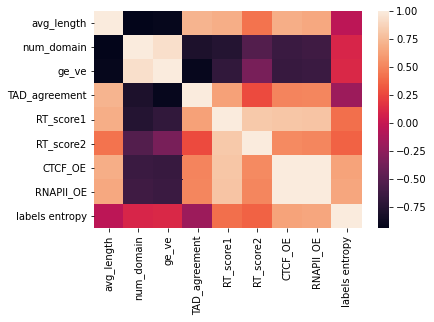

In [29]:
ax = sns.heatmap(np.corrcoef(stats.iloc[:,2:].transpose()))
ax.set_xticklabels(list(stats.columns[2:]), rotation = 90)
ax.set_yticklabels(list(stats.columns[2:]), rotation = 0)

# further visualization

In [79]:
GMM_combined_path = os.path.join(annotation_dir, 'GMM_combined_annotation.txt')

In [81]:
combined_coverage = evaluation_utils.get_coverage(GMM_combined_path)
GBR_coverage = evaluation_utils.get_coverage(GBR_annot_path)
HMRF_coverage = evaluation_utils.get_coverage(HMRF_annot_path)

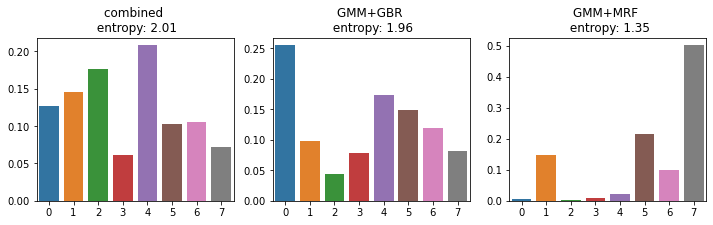

In [171]:
fig, axs = plt.subplots(1,3, figsize = (12,3))
titles = ['combined', 'GMM+GBR', 'GMM+MRF']
for c, coverage in enumerate([combined_coverage, GBR_coverage, HMRF_coverage]):
    labels = sorted(list(coverage.keys()))
    coverages = [coverage[label] for label in labels]
    ent = entropy(coverages, base=None)
    sns.barplot(x=labels, y=coverages, ax = axs[c])
    axs[c].set_title('{} \n entropy: {}'.format(titles[c],round(ent,2)), fontsize = 12)
fig.savefig('results/aggregative_models_coverages.png', dpi = 300,bbox_inches='tight',facecolor='white', transparent=False)

In [148]:
aggregative_models = stats.iloc[[2,15,16],:].loc[:,['CTCF_OE', 'RNAPII_OE','ge_ve','RT_score2']]
aggregative_models.rename(columns={'ge_ve': 'gene expression VE', 'RT_score2': 'RT score'}, inplace = True)
aggregative_models['name'] = ['combined', 'GMM_GBR', 'GMM_MRF']
aggregative_models = pd.melt(aggregative_models, id_vars=['name'])
aggregative_models['ratio'] = (9*aggregative_models['variable'].isin(['gene expression VE','RT score']))+1
aggregative_models['value'] = aggregative_models['value'] * aggregative_models['ratio']

/home/nedooshki/.local/lib/python3.6/site-packages/ipykernel_launcher.py:10: UserWarning: FixedFormatter should only be used together with FixedLocator
  # Remove the CWD from sys.path while we load stuff.


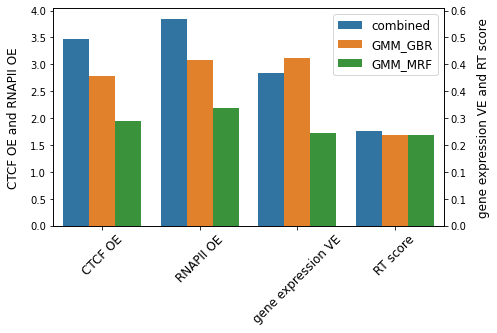

In [170]:
fig = plt.figure(figsize = (7,4))
ax1 = sns.barplot(x="variable", y="value", hue="name", data=aggregative_models, ci=None)
ax1.legend_.set_title(None)
plt.legend(loc="upper right", fontsize=12)
ax1.set_xlabel('')
ax1.set_xticklabels(['CTCF OE', 'RNAPII OE', 'gene expression VE', 'RT score'], fontsize = 12, rotation = 45)
ax1.set_ylabel('CTCF OE and RNAPII OE', fontsize = 12, labelpad=10)
ax2 = ax1.twinx()
ax2.set_ylim(ax1.get_ylim())
ax2.set_yticklabels(np.round(ax1.get_yticks()/7,1))
ax2.set_ylabel('gene expression VE and RT score', fontsize = 12, labelpad=10)
fig.savefig('results/aggregative_models_comp.png', dpi = 300,bbox_inches='tight',facecolor='white', transparent=False)